In [1]:
import numpy as np
import pandas as pd
import time

In [3]:
df = pd.read_csv('D:/full_deep_learning_notes/Social_Network_Ads (1).csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df[['Age','EstimatedSalary','Purchased']]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(400, 2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Lenovo\anaconda3\envs\amar\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
# stochastic gradient descent, batch size = 1
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5109 - loss: 0.6740 - val_accuracy: 0.9250 - val_loss: 0.5210
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8240 - loss: 0.4952 - val_accuracy: 0.7750 - val_loss: 0.4681
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.3824 - val_accuracy: 0.7500 - val_loss: 0.4243
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8595 - loss: 0.2969 - val_accuracy: 0.7500 - val_loss: 0.3800
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.2710 - val_accuracy: 0.8000 - val_loss: 0.3404
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8578 - loss: 0.3128 - val_accuracy: 0.8500 - val_loss: 0.3084
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9076 - loss: 0.2104 - val_accuracy: 0.9250 - val_loss: 0.2803
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8779 - loss: 0.2553 - val_accu

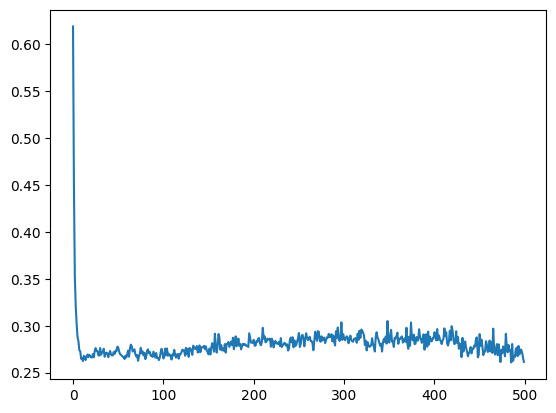

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Lenovo\anaconda3\envs\amar\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
# batch gradient descent, batch size = total samples
history = model.fit(X_scaled,y,epochs=500,batch_size=320,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - accuracy: 0.8281 - loss: 0.4263 - val_accuracy: 0.5875 - val_loss: 0.6911
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8250 - loss: 0.4215 - val_accuracy: 0.5875 - val_loss: 0.6883
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8250 - loss: 0.4181 - val_accuracy: 0.6000 - val_loss: 0.6857
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8250 - loss: 0.4153 - val_accuracy: 0.6000 - val_loss: 0.6831
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8313 - loss: 0.4129 - val_accuracy: 0.6125 - val_loss: 0.6808
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8313 - loss: 0.4106 - val_accuracy: 0.6125 - val_loss: 0.6785
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8313 - loss: 0.4086 - val_accuracy: 0.6125 - val_loss: 0.6764
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8313 - loss: 0.4066 - val_accuracy: 0.6125 - val_loss

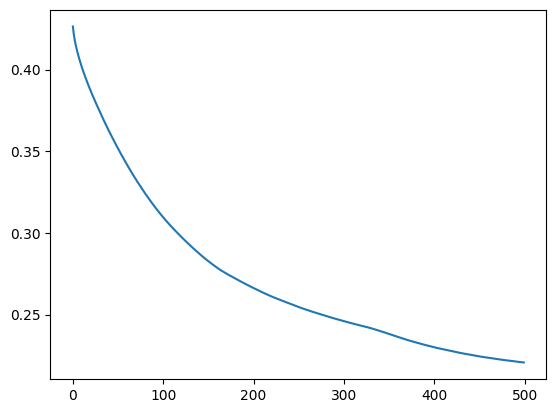

In [20]:
plt.plot(history.history['loss'])